In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Section 1: Survey Data

In [2]:
## Load data.
surveys = read_csv(os.path.join('data', 'surveys.csv'))

## Initialize screening DataFrame.
screen = DataFrame(dict(subject=surveys.subject)).set_index('subject')

#### 1.1 Infrequency items

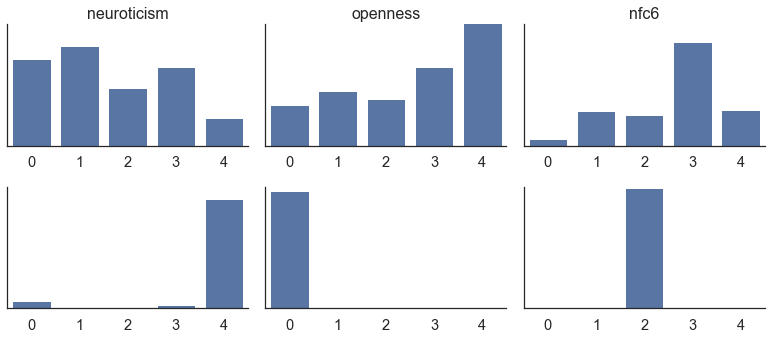

In [3]:
## Initialize canvas.
fig, axes = plt.subplots(2, 3, figsize=(11,5))
scales = ['neuroticism','openness','nfc6']
orders = [5,5,5]

## Store infrequency.
screen['infreq'] = surveys.infreq.values

## Iteratively plot scales.
for i, (scale, order) in enumerate(zip(scales, orders)):
    
    ## Extract data.
    y = surveys.filter(regex=f'{scale}_q').values
    
    ## Plot valid items.
    sns.countplot(x=y[:,:-1].flatten(), order=np.arange(order), color='#4c72b0', ax=axes[0,i])
    axes[0,i].set(ylim=(0,1200), yticks=[], ylabel='', title=scale)
    
    ## Plot infrequency items.
    sns.countplot(x=y[:,-1], order=np.arange(order), color='#4c72b0', ax=axes[1,i])
    axes[1,i].set(ylim=(0,350), yticks=[], ylabel='')
    
sns.despine()
plt.tight_layout()

## Section 2: MARS Data

In [4]:
## Load data.
mars = read_csv(os.path.join('data', 'mars.csv'))

#### 2.1 Screen issues

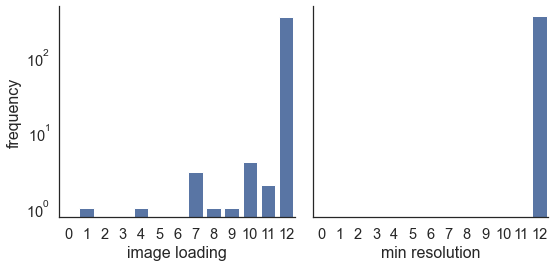

In [5]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

## Compute total issues per subject.
gb = mars.groupby('subject').agg({'all_loaded':'sum', 'minimum_resolution':'sum'})
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'all_loaded':'mars_load', 'minimum_resolution':'mars_res'})

## Plot screen issues.
sns.countplot(x=screen.mars_load, order=np.arange(13), color='#4c72b0', ax=axes[0])
sns.countplot(x=screen.mars_res, order=np.arange(13), color='#4c72b0', ax=axes[1])

## Add detail.
axes[0].set(xlabel='image loading', ylabel='frequency', yscale='log')
axes[1].set(xlabel='min resolution', ylabel='', yscale='log')

sns.despine()
plt.tight_layout()

#### 2.2 Missing data

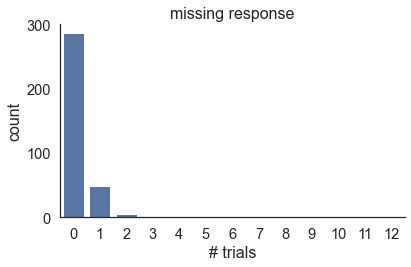

In [6]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = mars.groupby('subject').accuracy.apply(lambda x: x.isnull().sum())
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'accuracy':'mars_missing'})

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(13), ax=ax)
ax.set(xlabel='# trials', title='missing response')

sns.despine()
plt.tight_layout()

#### 2.3 Rapid response

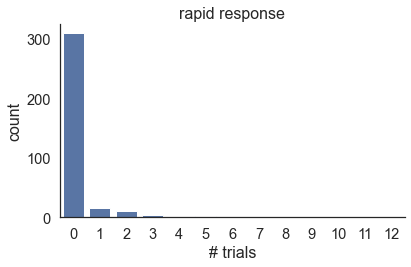

In [7]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = mars.groupby('subject').rt.apply(lambda x: (x < 3).sum())
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'rt':'mars_rapid'})

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(13), ax=ax)
ax.set(xlabel='# trials', title='rapid response')

sns.despine()
plt.tight_layout()

## Section 3: RPM Data

In [8]:
## Load data.
rpm = read_csv(os.path.join('data', 'rpm.csv'))

#### 3.1 Screen issues

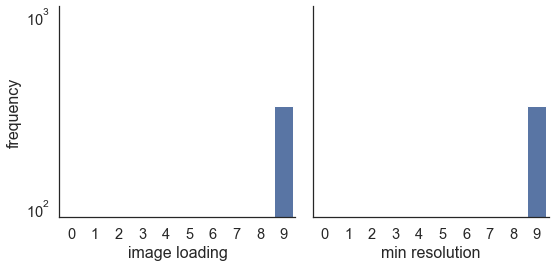

In [9]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

## Compute total issues per subject.
gb = rpm.groupby('subject').agg({'all_loaded':'sum', 'minimum_resolution':'sum'})
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'all_loaded':'rpm_load', 'minimum_resolution':'rpm_res'})

## Plot screen issues.
sns.countplot(x=screen.rpm_load, order=np.arange(10), color='#4c72b0', ax=axes[0])
sns.countplot(x=screen.rpm_res, order=np.arange(10), color='#4c72b0', ax=axes[1])

## Add detail.
axes[0].set(xlabel='image loading', ylabel='frequency', yscale='log')
axes[1].set(xlabel='min resolution', ylabel='', yscale='log')

sns.despine()
plt.tight_layout()

#### 3.2 Missing data

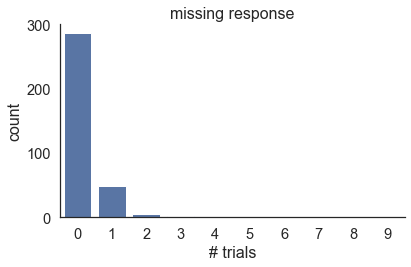

In [10]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = mars.groupby('subject').accuracy.apply(lambda x: x.isnull().sum())
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'accuracy':'rpm_missing'})

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(10), ax=ax)
ax.set(xlabel='# trials', title='missing response')

sns.despine()
plt.tight_layout()

#### 3.3 Rapid response

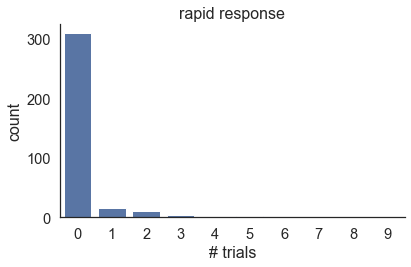

In [11]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = mars.groupby('subject').rt.apply(lambda x: (x < 3).sum())
screen = screen.merge(gb, left_index=True, right_index=True, how='outer')
screen = screen.rename(columns={'rt':'rpm_rapid'})

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(10), ax=ax)
ax.set(xlabel='# trials', title='rapid response')

sns.despine()
plt.tight_layout()

## Section 4: Apply Rejections

#### 4.1 Define rejections

In [12]:
## Convert to DataFrame.
reject = DataFrame(dict(subject=screen.index)).set_index('subject')

## Apply rejections.
reject['incomplete'] = np.where(screen.isnull().any(axis=1), 1, 0)
reject['infreq'] = np.where(screen.infreq >= 1, 1, 0)
reject['mars_load'] = np.where(screen.mars_load < 12, 1, 0)
reject['rpm_load'] = np.where(screen.rpm_load < 9, 1, 0)
reject['mars_missing'] = np.where(screen.mars_missing >= 4, 1, 0)
reject['rpm_missing'] = np.where(screen.rpm_missing >= 4, 1, 0)
reject['mars_rapid'] = np.where(screen.mars_rapid >= 4, 1, 0)
reject['rpm_rapid'] = np.where(screen.rpm_rapid >= 4, 1, 0)
reject['reject'] = reject.sum(axis=1)

## Save.
reject.to_csv(os.path.join('data', 'reject.csv'))

#### 2.2 Summarize rejections

In [13]:
## Compute total rejections.
N = reject.shape[0]
K = reject.query('reject > 0').shape[0]
print('Summary:\n%s / %s (%0.2f%%) rejected' %(K,N,K/N*100))
print('%s retained\n' %(N - K))

## Compute sums by cause.
print(reject[reject.columns[:-1]].sum())

Summary:
49 / 348 (14.08%) rejected
299 retained

incomplete      10
infreq          29
mars_load       13
rpm_load         0
mars_missing     0
rpm_missing      0
mars_rapid       3
rpm_rapid        3
dtype: int64
